<a href="https://colab.research.google.com/github/marianvinas/DS-Unit-2-Linear-Models/blob/master/MarianVinasCopy_of_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [0]:
#Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
train = df[df.Date.dt.year <= 2016]
val = df[df.Date.dt.year == 2017]
test = df[df.Date.dt.year >= 2018]

In [10]:
train.shape, test.shape, val.shape

((298, 59), (38, 59), (85, 59))

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, random_state=42)

In [13]:
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)

False    0.578475
True     0.421525
Name: Great, dtype: float64

In [14]:
majority_class = y_train.mode()[0]
majority_class

False

In [0]:
y_train_pred = [majority_class]*len(y_train)

In [16]:
from sklearn.metrics import accuracy_score, mean_absolute_error

accuracy_score(y_train, y_train_pred)

0.57847533632287

In [17]:
y_val = val[target]
y_pred = [majority_class]*len(val)
accuracy_score(y_val, y_pred)

0.6266666666666667

In [18]:
train.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,54.000000,54.000000,220.000000,222.000000,0.0,0.0,133.000000,132.000000,132.000000,223.000000,213.000000,215.000000,222.000000,217.000000,221.000000,210.000000,221.000000,221.000000,0.0
mean,3.864815,4.133333,6.902409,3.464640,NaN,NaN,19.772782,21.947727,0.762727,3.485650,3.763850,3.586744,3.552027,3.530553,3.391855,3.340238,3.584615,3.951131,NaN
std,0.481804,0.327368,1.261173,0.857374,NaN,NaN,2.117857,1.682528,0.140289,0.790638,0.956042,0.811828,0.835176,1.012019,1.082601,1.003910,0.882926,1.184775,NaN
min,2.500000,3.300000,2.990000,0.500000,NaN,NaN,15.000000,17.000000,0.400000,1.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,NaN,NaN,18.500000,20.950000,0.650000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,2.562500,3.000000,3.500000,NaN
50%,4.000000,4.150000,6.850000,3.500000,NaN,NaN,19.500000,22.000000,0.750000,3.500000,4.000000,3.500000,3.500000,4.000000,3.500000,3.500000,4.000000,4.000000,NaN
75%,4.000000,4.375000,7.500000,4.000000,NaN,NaN,21.000000,23.000000,0.870000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,4.900000,11.950000,5.000000,NaN,NaN,26.000000,26.500000,1.240000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [19]:
train.describe(exclude='number')

,Burrito,Date,Chips,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
count,223,223,18,20,5,120,102,102,110,86,59,31,17,15,5,28,25,7,6,5,1,7,28,3,11,12,4,5,1,3,3,1,4,2,2,2,9,2,1,223
unique,5,100,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,1,2
top,Other,2016-08-30 00:00:00,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,False
freq,86,22,15,20,3,92,80,72,88,70,42,19,16,13,3,20,18,5,4,3,1,5,25,2,6,6,3,3,1,3,3,1,4,2,2,2,9,1,1,129
first,NaN,2016-01-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-12-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()


features = ['Yelp', 'Google', 'Cost', 'Hunger' ]
X_train = train[features]
X_val = val[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)


linear_reg.fit(X_train_imputed, y_train)


linear_reg.predict(X_val_imputed)


array([0.46486389, 0.38633763, 0.42420249, 0.42477609, 0.52991306,
       0.40532837, 0.44581225, 0.44533541, 0.46677555, 0.35371848,
       0.52154198, 0.53450315, 0.38005699, 0.33099956, 0.48564946,
       0.37008252, 0.37324696, 0.52106514, 0.37008252, 0.33783128,
       0.42944821, 0.51616677, 0.44581225, 0.40257217, 0.62747901,
       0.42699902, 0.75139304, 0.30558004, 0.32116814, 0.35126929,
       0.35098767, 0.51568993, 0.13261975, 0.38005699, 0.46462547,
       0.46677555, 0.55056809, 0.52693018, 0.46206736, 0.44849985,
       0.45899967, 0.49365158, 0.31095524, 0.42335774, 0.53450315,
       0.45877342, 0.49418911, 0.17519721, 0.41928909, 0.36199132,
       0.42891069, 0.51616677, 0.41792185, 0.47103916, 0.51568993,
       0.38670245, 0.46677555, 0.49250356, 0.56991884, 0.37008252,
       0.13956458, 0.34219212, 0.38913416, 0.28112494, 0.4271283 ,
       0.27309038, 0.42891069, 0.36691807, 0.34272964, 0.47782507,
       0.23922658, 0.56015566, 0.41302349, 0.38304369, 0.35126

In [24]:
pd.Series(linear_reg.coef_, features)

Yelp      0.250123
Google   -0.054870
Cost      0.053752
Hunger    0.075730
dtype: float64

In [28]:
test_case = [[0, 5, 500, 13]] 
linear_reg.predict(test_case)

array([26.63441562])

In [29]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, y_train)

#print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))
y_pred = log_reg.predict(X_val_imputed)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.6533333333333333


In [30]:
log_reg.predict(X_val_imputed)

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [31]:
log_reg.predict(test_case)

array([ True])

In [32]:
log_reg.predict_proba(test_case)

array([[0., 1.]])

In [33]:
#coefficient
log_reg.coef_

array([[0.74096435, 0.02604562, 0.22695233, 0.32692276]])

In [34]:
#intercept
log_reg.intercept_

array([-6.00308024])

In [0]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [36]:
log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case))

array([[111.85330978]])

In [37]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[1.]])

In [38]:
#scikit-learn for logistic regression
train.head()

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
227,California,2016-09-11,NaN,NaN,NaN,5.79,4.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,4.0,2.5,3.5,4.0,2.0,2.5,5.0,NaN,NaN,x,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
79,Other,2016-04-27,NaN,NaN,NaN,6.39,3.0,NaN,NaN,23.0,22.5,0.93,4.0,3.0,2.5,3.5,3.0,3.0,3.5,4.0,3.5,NaN,NaN,X,NaN,X,X,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
66,California,2016-04-15,4.5,4.4,x,6.25,4.0,NaN,NaN,NaN,NaN,NaN,4.5,4.5,2.5,3.5,3.5,3.5,3.0,4.0,5.0,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
298,California,2016-12-10,3.5,3.7,NaN,7.75,4.0,NaN,NaN,20.0,21.0,0.70,3.5,2.5,3.0,3.3,1.4,2.3,2.2,3.3,4.5,NaN,NaN,X,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
283,Asada,2016-11-16,NaN,NaN,NaN,6.75,3.0,NaN,NaN,18.0,21.5,0.66,4.5,4.7,4.5,3.5,4.0,4.5,4.5,3.5,5.0,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [40]:
features = ['Burrito', 'Cost']
target = 'Great'
X_train = train[features]
X_val = val[features]
y_train = train[target]
y_val = val[target]

X_train.shape, X_val.shape

((223, 2), (75, 2))

In [41]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True)
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)

In [43]:
X_train_enc.shape

(223, 6)

In [44]:
X_train_enc.head()

,Burrito_California,Burrito_Other,Burrito_Asada,Burrito_Carnitas,Burrito_Surf & Turf,Cost
227,1,0,0,0,0,5.79
79,0,1,0,0,0,6.39
66,1,0,0,0,0,6.25
298,1,0,0,0,0,7.75
283,0,0,1,0,0,6.75


In [0]:
imputer = SimpleImputer()
X_train_imp = imputer.fit_transform(X_train_enc)
X_val_imp = imputer.transform(X_val_enc)

In [46]:
X_train_imp.shape

(223, 6)

In [0]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_val_sc = scaler.transform(X_val_imp)

In [0]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_enc.columns)
X_val_sc = pd.DataFrame(X_val_sc, columns=X_val_enc.columns)

In [49]:
X_train_sc.head()

,Burrito_California,Burrito_Other,Burrito_Asada,Burrito_Carnitas,Burrito_Surf & Turf,Cost
0,1.274178,-0.792299,-0.355335,-0.227787,-0.278019,-0.890062
1,-0.784820,1.262150,-0.355335,-0.227787,-0.278019,-0.409989
2,1.274178,-0.792299,-0.355335,-0.227787,-0.278019,-0.522006
3,1.274178,-0.792299,-0.355335,-0.227787,-0.278019,0.678176
4,-0.784820,-0.792299,2.814249,-0.227787,-0.278019,-0.121946


In [50]:
model = LogisticRegressionCV()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_val_sc)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.7066666666666667


In [51]:
coefs = model.coef_[0]
coefs = pd.Series(coefs, X_train_sc.columns)
coefs

Burrito_California     0.124268
Burrito_Other         -0.117456
Burrito_Asada          0.029172
Burrito_Carnitas       0.038827
Burrito_Surf & Turf   -0.080574
Cost                   0.228688
dtype: float64

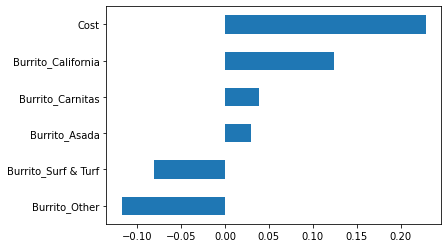

In [52]:
coefs.sort_values().plot.barh()

In [53]:
test.head()


,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
77,California,2026-04-25,NaN,NaN,NaN,8.00,4.0,NaN,NaN,21.59,NaN,NaN,4.5,5.0,5.0,5.0,4.5,5.0,3.0,5.0,5.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
386,California,2018-01-02,NaN,NaN,NaN,7.25,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
387,Other,2018-01-09,4.5,3.8,NaN,4.19,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,x,NaN,NaN,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,False
388,California,2018-01-12,3.5,4.3,NaN,7.00,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
389,Other,2018-01-12,NaN,NaN,NaN,8.50,4.0,NaN,NaN,21.00,23.5,0.92,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [54]:
features

['Burrito', 'Cost']

In [55]:
X_test = test[features]
X_test_enc = encoder.transform(X_test)
X_test_imp = imputer.transform(X_test_enc)
X_test_sc = scaler.transform(X_test_imp)
X_test_sc

array([[ 1.27417794, -0.7922987 , -0.35533453, -0.22778673, -0.27801922,
         0.87820591],
       [ 1.27417794, -0.7922987 , -0.35533453, -0.22778673, -0.27801922,
         0.2781149 ],
       [-0.78481974,  1.26215025, -0.35533453, -0.22778673, -0.27801922,
        -2.1702564 ],
       [ 1.27417794, -0.7922987 , -0.35533453, -0.22778673, -0.27801922,
         0.07808457],
       [-0.78481974,  1.26215025, -0.35533453, -0.22778673, -0.27801922,
         1.27826658],
       [-0.78481974, -0.7922987 ,  2.81424946, -0.22778673, -0.27801922,
         0.23810884],
       [-0.78481974, -0.7922987 , -0.35533453,  4.39007144, -0.27801922,
        -0.73003799],
       [-0.78481974, -0.7922987 , -0.35533453,  4.39007144, -0.27801922,
        -0.73003799],
       [-0.78481974, -0.7922987 , -0.35533453,  4.39007144, -0.27801922,
        -0.73003799],
       [ 1.27417794, -0.7922987 , -0.35533453, -0.22778673, -0.27801922,
         1.67032604],
       [ 1.27417794, -0.7922987 , -0.35533453, -0.

In [56]:
y_pred = model.predict(X_test_sc)
y_pred

array([ True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False])

In [57]:
test

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
77,California,2026-04-25,NaN,NaN,NaN,8.00,4.0,NaN,NaN,21.59,NaN,NaN,4.5,5.0,5.0,5.0,4.5,5.0,3.0,5.0,5.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
386,California,2018-01-02,NaN,NaN,NaN,7.25,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
387,Other,2018-01-09,4.5,3.8,NaN,4.19,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,x,NaN,NaN,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,False
388,California,2018-01-12,3.5,4.3,NaN,7.00,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
389,Other,2018-01-12,NaN,NaN,NaN,8.50,4.0,NaN,NaN,21.00,23.5,0.92,4.0,4.0,3.0,3.5,1.0,2.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
390,Asada,2018-04-04,NaN,NaN,NaN,7.20,3.0,NaN,NaN,24.50,22.7,1.00,4.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
391,Carnitas,2018-04-09,NaN,NaN,NaN,5.99,3.0,NaN,NaN,20.00,23.0,0.84,3.5,5.0,4.3,3.5,5.0,4.0,3.0,3.8,2.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
392,Carnitas,2018-04-09,NaN,NaN,NaN,5.99,3.5,NaN,NaN,17.50,24.0,0.80,4.0,4.5,5.0,4.5,5.0,4.0,4.0,4.5,4.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
393,Carnitas,2018-04-09,NaN,NaN,NaN,5.99,2.0,NaN,NaN,19.00,24.5,0.91,2.0,3.5,4.5,4.0,4.0,2.0,3.0,4.0,2.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
394,California,2018-04-14,NaN,NaN,NaN,8.99,4.0,NaN,NaN,25.00,23.0,1.05,4.5,4.5,4.0,4.0,3.0,4.0,3.5,4.0,3.0,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [58]:
submission = test[['Burrito']].copy()
submission

,Burrito
77,California
386,California
387,Other
388,California
389,Other
390,Asada
391,Carnitas
392,Carnitas
393,Carnitas
394,California


In [0]:
submission['Great'] = y_pred

In [60]:
submission

,Burrito,Great
77,California,True
386,California,False
387,Other,False
388,California,False
389,Other,False
390,Asada,False
391,Carnitas,False
392,Carnitas,False
393,Carnitas,False
394,California,True


In [0]:
submission.to_csv('my_submission.csv', index=False)